<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [2]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../../data/adult.data.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('precision', 2)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
print(data.shape)
data.describe()

(32561, 15)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,3.26e+04,32561.00,32561.00,32561.00,32561.00
mean,38.58,1.90e+05,10.08,1077.65,87.30,40.44
std,13.64,1.06e+05,2.57,7385.29,402.96,12.35
min,17.00,1.23e+04,1.00,0.00,0.00,1.00
25%,28.00,1.18e+05,9.00,0.00,0.00,40.00
50%,37.00,1.78e+05,10.00,0.00,0.00,40.00
75%,48.00,2.37e+05,12.00,0.00,0.00,45.00
max,90.00,1.48e+06,16.00,99999.00,4356.00,99.00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data.describe(include=['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


**1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

In [23]:
# Ваш код здесь
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак age) женщин?**

In [36]:
# Ваш код здесь

data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак native-country)?**

In [49]:
data["native-country"].drop_duplicates()

0                     United-States
4                              Cuba
6                           Jamaica
11                            India
14                                ?
15                           Mexico
27                            South
35                      Puerto-Rico
52                         Honduras
98                          England
112                          Canada
122                         Germany
135                            Iran
152                     Philippines
201                           Italy
217                          Poland
228                        Columbia
255                        Cambodia
265                        Thailand
289                         Ecuador
304                            Laos
311                          Taiwan
338                           Haiti
359                        Portugal
427              Dominican-Republic
497                     El-Salvador
503                          France
771                       Gu

In [56]:
data["native-country"].value_counts(normalize=True)['Germany']

0.0042074874850281012

In [24]:
data["native-country"].value_counts(normalize=True)

United-States                 8.96e-01
Mexico                        1.97e-02
?                             1.79e-02
Philippines                   6.08e-03
Germany                       4.21e-03
Canada                        3.72e-03
Puerto-Rico                   3.50e-03
El-Salvador                   3.26e-03
India                         3.07e-03
Cuba                          2.92e-03
England                       2.76e-03
Jamaica                       2.49e-03
South                         2.46e-03
China                         2.30e-03
Italy                         2.24e-03
Dominican-Republic            2.15e-03
Vietnam                       2.06e-03
Guatemala                     1.97e-03
Japan                         1.90e-03
Poland                        1.84e-03
Columbia                      1.81e-03
Taiwan                        1.57e-03
Haiti                         1.35e-03
Iran                          1.32e-03
Portugal                      1.14e-03
Nicaragua                

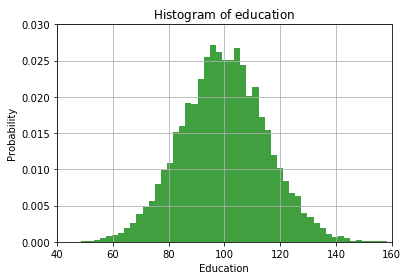

In [63]:
# Ваш код здесь


**4. Постройте гистограмму распределения (bar plot) образования людей (признак education).**

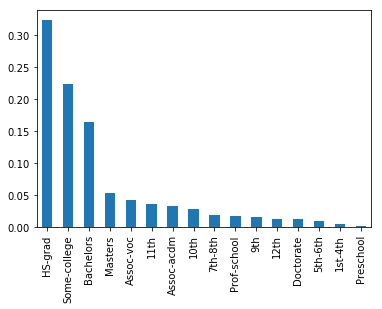

In [92]:
# Ваш код здесь
data['education'].value_counts(normalize=True).plot(kind = 'bar')


In [100]:
#так не работает -- только чичленные данные!!!
data['education'].plot(kind = 'hist')

TypeError: Empty 'DataFrame': no numeric data to plot

Populating the interactive namespace from numpy and matplotlib


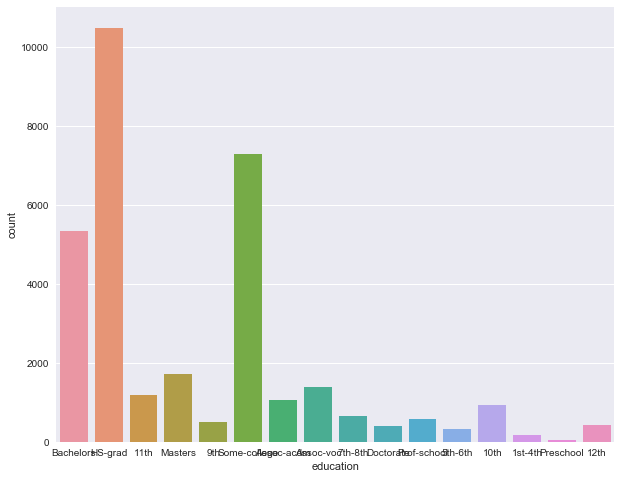

In [157]:
# !conda install seaborn # надо дополнительно установить (команда в терминале)
# чтоб картинки рисовались в тетрадке
%pylab inline 
import seaborn as sns
figsize(10,8)

sns.countplot(x='education', data=data);
savefig('int_plan_and_churn.png', dpi=300);

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? **

In [77]:
data['salary'].describe()

count     32561
unique        2
top       <=50K
freq      24720
Name: salary, dtype: object

In [78]:
# Ваш код здесь
data[data['salary'] == '<=50K']['age'].describe()

count    24720.00
mean        36.78
std         14.02
min         17.00
25%         25.00
50%         34.00
75%         46.00
max         90.00
Name: age, dtype: float64

In [88]:
data[(data['salary'] == '<=50K') & (data['age']>0)].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,24720.00,2.47e+04,24720.00,24720.00,24720.00,24720.00
mean,36.78,1.90e+05,9.60,148.75,53.14,38.84
std,14.02,1.06e+05,2.44,963.14,310.76,12.32
min,17.00,1.23e+04,1.00,0.00,0.00,1.00
25%,25.00,1.18e+05,9.00,0.00,0.00,35.00
50%,34.00,1.79e+05,9.00,0.00,0.00,40.00
75%,46.00,2.39e+05,10.00,0.00,0.00,40.00
max,90.00,1.48e+06,16.00,41310.00,4356.00,99.00


In [89]:
data[data['salary'] == '<=50K']['age'].mean()

36.78373786407767

In [25]:
data[data['salary'] == '>50K']['age'].describe()

count    7841.00
mean       44.25
std        10.52
min        19.00
25%        36.00
50%        44.00
75%        51.00
max        90.00
Name: age, dtype: float64

**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [148]:
# Ваш код здесь
pd.crosstab(data['education'], data['salary'])

salary,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [186]:
data = pd.read_csv('../../data/adult.data.csv')



d = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Masters', 'Doctorate']
high_education = data['education'].map(lambda x: x in d)

data.insert(loc = len(data.columns),
           column = "high education",
           value = high_education)
data.head()

pd.crosstab(data['high education'], data['salary'])

salary,<=50K,>50K
high education,,
False,19760,3667
True,4960,4174


**7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [205]:
# Ваш код здесь
data.groupby(['race', 'sex'])['age'].describe(percentiles=[])

race                sex          
Amer-Indian-Eskimo  Female  count      119.00
                            mean        37.12
                            std         13.11
                            min         17.00
                            50%         36.00
                            max         80.00
                    Male    count      192.00
                            mean        37.21
                            std         12.05
                            min         17.00
                            50%         35.00
                            max         82.00
Asian-Pac-Islander  Female  count      346.00
                            mean        35.09
                            std         12.30
                            min         17.00
                            50%         33.00
                            max         75.00
                    Male    count      693.00
                            mean        39.07
                            std         12.88


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)?**

In [11]:
# Ваш код здесь
menData = data[data['sex'] == "Male"]
pd.crosstab(menData['marital-status'], menData[menData['salary'] == ">50K"]['salary'])

salary,>50K
marital-status,
Divorced,284
Married-AF-spouse,4
Married-civ-spouse,5938
Married-spouse-absent,23
Never-married,325
Separated,49
Widowed,39


**9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [19]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,3.26e+04,32561.00,32561.00,32561.00,32561.00
mean,38.58,1.90e+05,10.08,1077.65,87.30,40.44
std,13.64,1.06e+05,2.57,7385.29,402.96,12.35
min,17.00,1.23e+04,1.00,0.00,0.00,1.00
25%,28.00,1.18e+05,9.00,0.00,0.00,40.00
50%,37.00,1.78e+05,10.00,0.00,0.00,40.00
75%,48.00,2.37e+05,12.00,0.00,0.00,45.00
max,90.00,1.48e+06,16.00,99999.00,4356.00,99.00


In [20]:
# Ваш код здесь
data[data["hours-per-week"] == 99].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,85.00,85.00,85.00,85.00,85.00,85.0
mean,43.52,161462.13,10.61,799.53,125.72,99.0
std,13.34,103387.09,3.42,2932.86,508.92,0.0
min,19.00,24790.00,4.00,0.00,0.00,99.0
25%,34.00,89681.00,9.00,0.00,0.00,99.0
50%,42.00,158712.00,10.00,0.00,0.00,99.0
75%,51.00,208826.00,13.00,0.00,0.00,99.0
max,90.00,511289.00,16.00,15024.00,2415.00,99.0


In [22]:
data[data["hours-per-week"] == 99]['salary'].value_counts(normalize=True)

<=50K    0.71
>50K     0.29
Name: salary, dtype: float64

**10. Посчитайте среднее время работы (hours-per-week) зарабатывающих много и мало (salary) для каждой страны (native-country).**

In [29]:
data['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [30]:
# Ваш код здесь
pd.set_option('display.max_rows', 10000)
data.groupby(['native-country', 'salary'])['hours-per-week'].describe(percentiles=[])

native-country              salary       
?                           <=50K   count      437.00
                                    mean        40.16
                                    std         12.82
                                    min          1.00
                                    50%         40.00
                                    max         99.00
                            >50K    count      146.00
                                    mean        45.55
                                    std         10.20
                                    min          8.00
                                    50%         40.00
                                    max         80.00
Cambodia                    <=50K   count       12.00
                                    mean        41.42
                                    std          3.09
                                    min         40.00
                                    50%         40.00
                                    max 